<a href="https://colab.research.google.com/github/zakarya-elmimouni/Plant_Desease_recognition/blob/main/Desease_Treesplant_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant_Desease_Recognition

Dans ce projet l'objectif est de détecter différents types de maladies qui attaquent les plantes en se basant sur les données disponibles dans  base donnée "plantvillage".

# Dataset

la base de donnée est disponible sur https://www.kaggle.com/datasets/emmarex/plantdisease

Mounted at /content/drive




# Unzip Data







In [1]:
# unzip file that contains our data
!unzip -q /content/drive/MyDrive/PlantVillagedataset/plantvillagedataset.zip -d /content  # unzip

# Labelise Images

In [3]:
# j'ai utilisé uniquement 4 catégories puisque la dataset est large qu'elle plante Google collab
import os
import cv2
dataset_path = "/content/PlantVillage"
categories = os.listdir(dataset_path)

data = []
labels = []

for category in categories[:3]:
    category_path = os.path.join(dataset_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        try:
            img = cv2.imread(image_path)
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray,(256, 256))  # Resize the image to a desired size
            data.append(resized)
            labels.append(category)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

In [3]:
print('la taille de la base de donnée est:',len(data))
#check
print(len(data)==len(labels))

la taille de la base de donnée est: 5436
True


# Preprocessing

In [4]:
import numpy as np
data=np.array(data)/255.0
labels=np.array(labels)


In [5]:
data=np.reshape(data,(data.shape[0],256,256,1))


In [6]:
from sklearn.preprocessing import LabelEncoder
# Create a Label Encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Color' column
new_labels = label_encoder.fit_transform(labels)

In [15]:
categories={0:'Pepperbell_Bacterial_spot',1:'Pepperbell healthy',2:"Potato Early_blight",3:"potato late blight"}

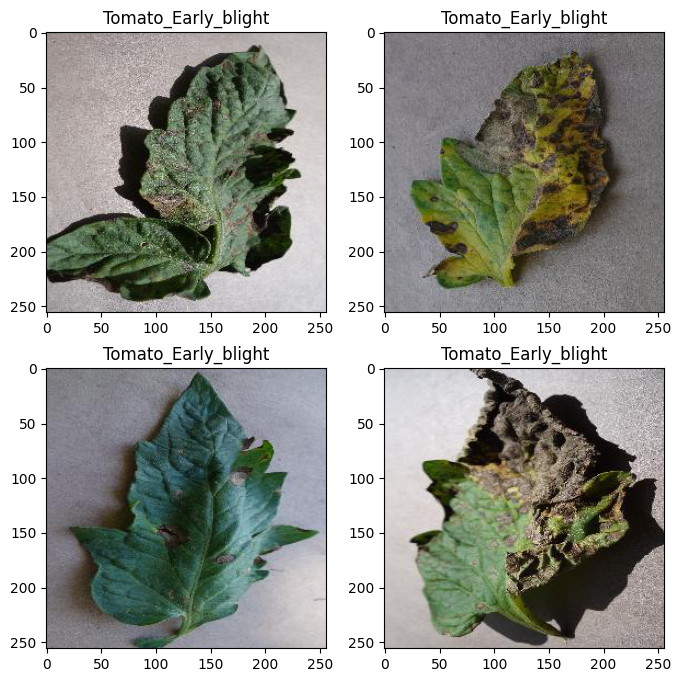

In [ ]:
import matplolib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Parcourir les tableaux d'images et les afficher dans les sous-graphiques correspondants
for i, ax in enumerate(axes.flat):
        ax.imshow(data[i])
        ax.set_title(str(labels[i]))

# Afficher le cadre contenant les images
plt.show()


# Split train and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,new_labels)

# Show some images

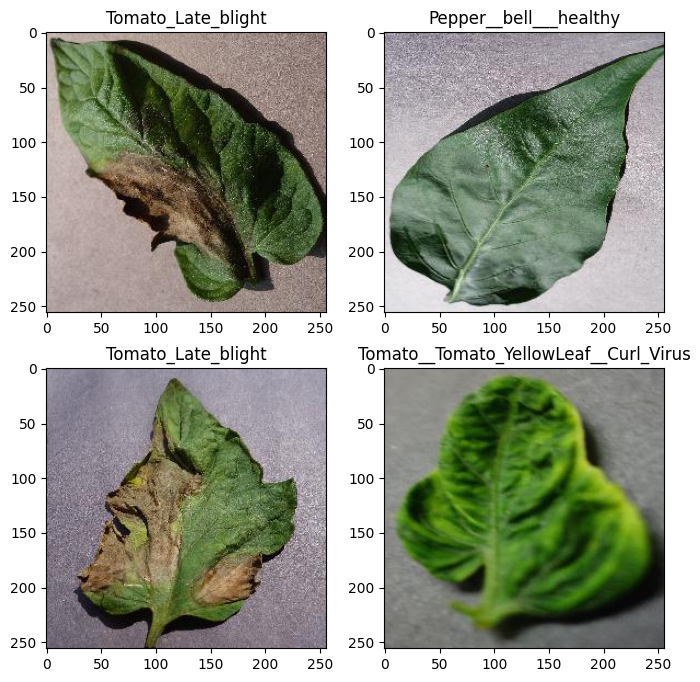

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Parcourir les tableaux d'images et les afficher dans les sous-graphiques correspondants
for i, ax in enumerate(axes.flat):
        ax.imshow(np.squeeze(X_train[i]))
        ax.set_title(str(y_train[i]))

# Afficher le cadre contenant les images
plt.show()


# Set the model

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=(256,256,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(4,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Train the model

In [11]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
67/67 [==============================] - 27s 182ms/step - loss: 0.9434 - accuracy: 0.5099 - val_loss: 0.6709 - val_accuracy: 0.7656
Epoch 2/50
67/67 [==============================] - 10s 154ms/step - loss: 0.5382 - accuracy: 0.7930 - val_loss: 0.3774 - val_accuracy: 0.8620
Epoch 3/50
67/67 [==============================] - 10s 153ms/step - loss: 0.3870 - accuracy: 0.8474 - val_loss: 0.2742 - val_accuracy: 0.9036
Epoch 4/50
67/67 [==============================] - 10s 154ms/step - loss: 0.2824 - accuracy: 0.8842 - val_loss: 0.2486 - val_accuracy: 0.8979
Epoch 5/50
67/67 [==============================] - 10s 154ms/step - loss: 0.2259 - accuracy: 0.9173 - val_loss: 0.1583 - val_accuracy: 0.9433
Epoch 6/50
67/67 [==============================] - 11s 163ms/step - loss: 0.2064 - accuracy: 0.9197 - val_loss: 0.2537 - val_accuracy: 0.8960
Epoch 7/50
67/67 [==============================] - 10s 153ms/step - loss: 0.1646 - accuracy: 0.9357 - val_loss: 0.1934 - val_accuracy: 0.9376

# Evaluer le modèle

In [13]:
#évaluer le modèle
vaL_loss, val_accuracy= model.evaluate(X_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy*100,"%")

test loss: 0.05874095484614372 %
test accuracy: 98.29931855201721 %


# Tester le modèle sur une image

1/1 [==============================] - 0s 29ms/step
A.I predicts: Pepperbell_Bacterial_spot
Correct prediction for label 0 is Pepperbell_Bacterial_spot


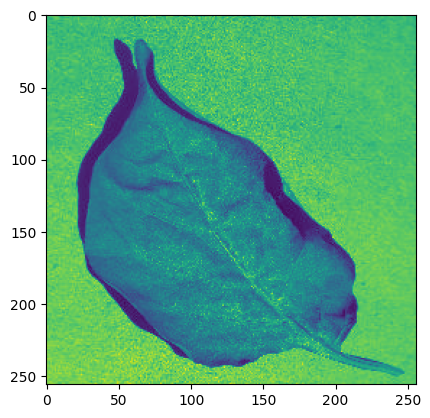

In [16]:
X =8
img_size = 256
img_single = X_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

In [17]:
model.save('Desease_trees.h5')